In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install autoviz

In [3]:
!pip install dabl

# Import libraries

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
import dabl

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


# Import the dataset 

In [5]:
df=pd.read_csv('/content/drive/MyDrive/higgs/For_modeling.csv')

In [6]:
df.drop(["Unnamed: 0"], axis= 1, inplace=True)

# Step 1 : Exploratory Data Analysis and Preprocessing

In [ ]:
print('The DataFrame contains {} lines and {} columns '.format(df.shape[0],df.shape[1]))

The DataFrame contains 9601139 lines and 25 columns 


In [ ]:
df.dtypes

Duration        int64
Distance        int64
PLong         float64
PLatd         float64
DLong         float64
DLatd         float64
Haversine     float64
Pmonth          int64
Pday            int64
Phour           int64
Pmin            int64
PDweek          int64
Dmonth          int64
Dday            int64
Dhour           int64
Dmin            int64
DDweek          int64
Temp          float64
Precip        float64
Wind          float64
Humid         float64
Solar         float64
Snow          float64
GroundTemp    float64
Dust          float64
dtype: object


##### Here is the statitical description of the features

In [ ]:
df.describe().T

count         mean  ...          75%           max
Duration    9601139.0    25.802937  ...    36.000000    119.000000
Distance    9601139.0  3713.518718  ...  4620.000000  33290.000000
PLong       9601139.0    37.547612  ...    37.573242     37.689720
PLatd       9601139.0   126.990799  ...   127.061768    127.180267
DLong       9601139.0    37.547696  ...    37.573242     37.689720
DLatd       9601139.0   126.990736  ...   127.062424    127.180267
Haversine   9601139.0     1.870315  ...     2.363812     28.634480
Pmonth      9601139.0     7.578754  ...    10.000000     12.000000
Pday        9601139.0    15.767139  ...    23.000000     31.000000
Phour       9601139.0    14.378007  ...    19.000000     23.000000
Pmin        9601139.0    29.149479  ...    44.000000     59.000000
PDweek      9601139.0     2.943812  ...     5.000000      6.000000
Dmonth      9601139.0     7.579198  ...    10.000000     12.000000
Dday        9601139.0    15.766658  ...    23.000000     31.000000
Dhour       9601139.0    14.426200  ...    20.000000     23.000000
Dmin        9601139.0    29.992779  ...    45.000000     59.000000
DDweek      9601139.0     2.945771  ...     5.000000      6.000000
Temp        9601139.0    18.562008  ...    25.500000     39.400000
Precip      9601139.0     0.017849  ...     0.000000     35.000000
Wind        9601139.0     1.819274  ...     2.400000      7.400000
Humid       9601139.0    53.975650  ...    67.000000     98.000000
Solar       9601139.0     0.730068  ...     1.260000      3.520000
Snow        9601139.0     0.009949  ...     0.000000      8.800000
GroundTemp  9601139.0    20.723763  ...    28.500000     62.200000
Dust        9601139.0    32.457983  ...    42.000000    304.000000

[25 rows x 8 columns]

#####  Verify that there are no missing values

In [ ]:
df.isnull().sum()

Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

####   

## Here are the correlations between variables 

#### We can see that on the target variable line the most correlated variables to the duration is  : 
<li>the distance
<li>the haversine
<li>Dhour

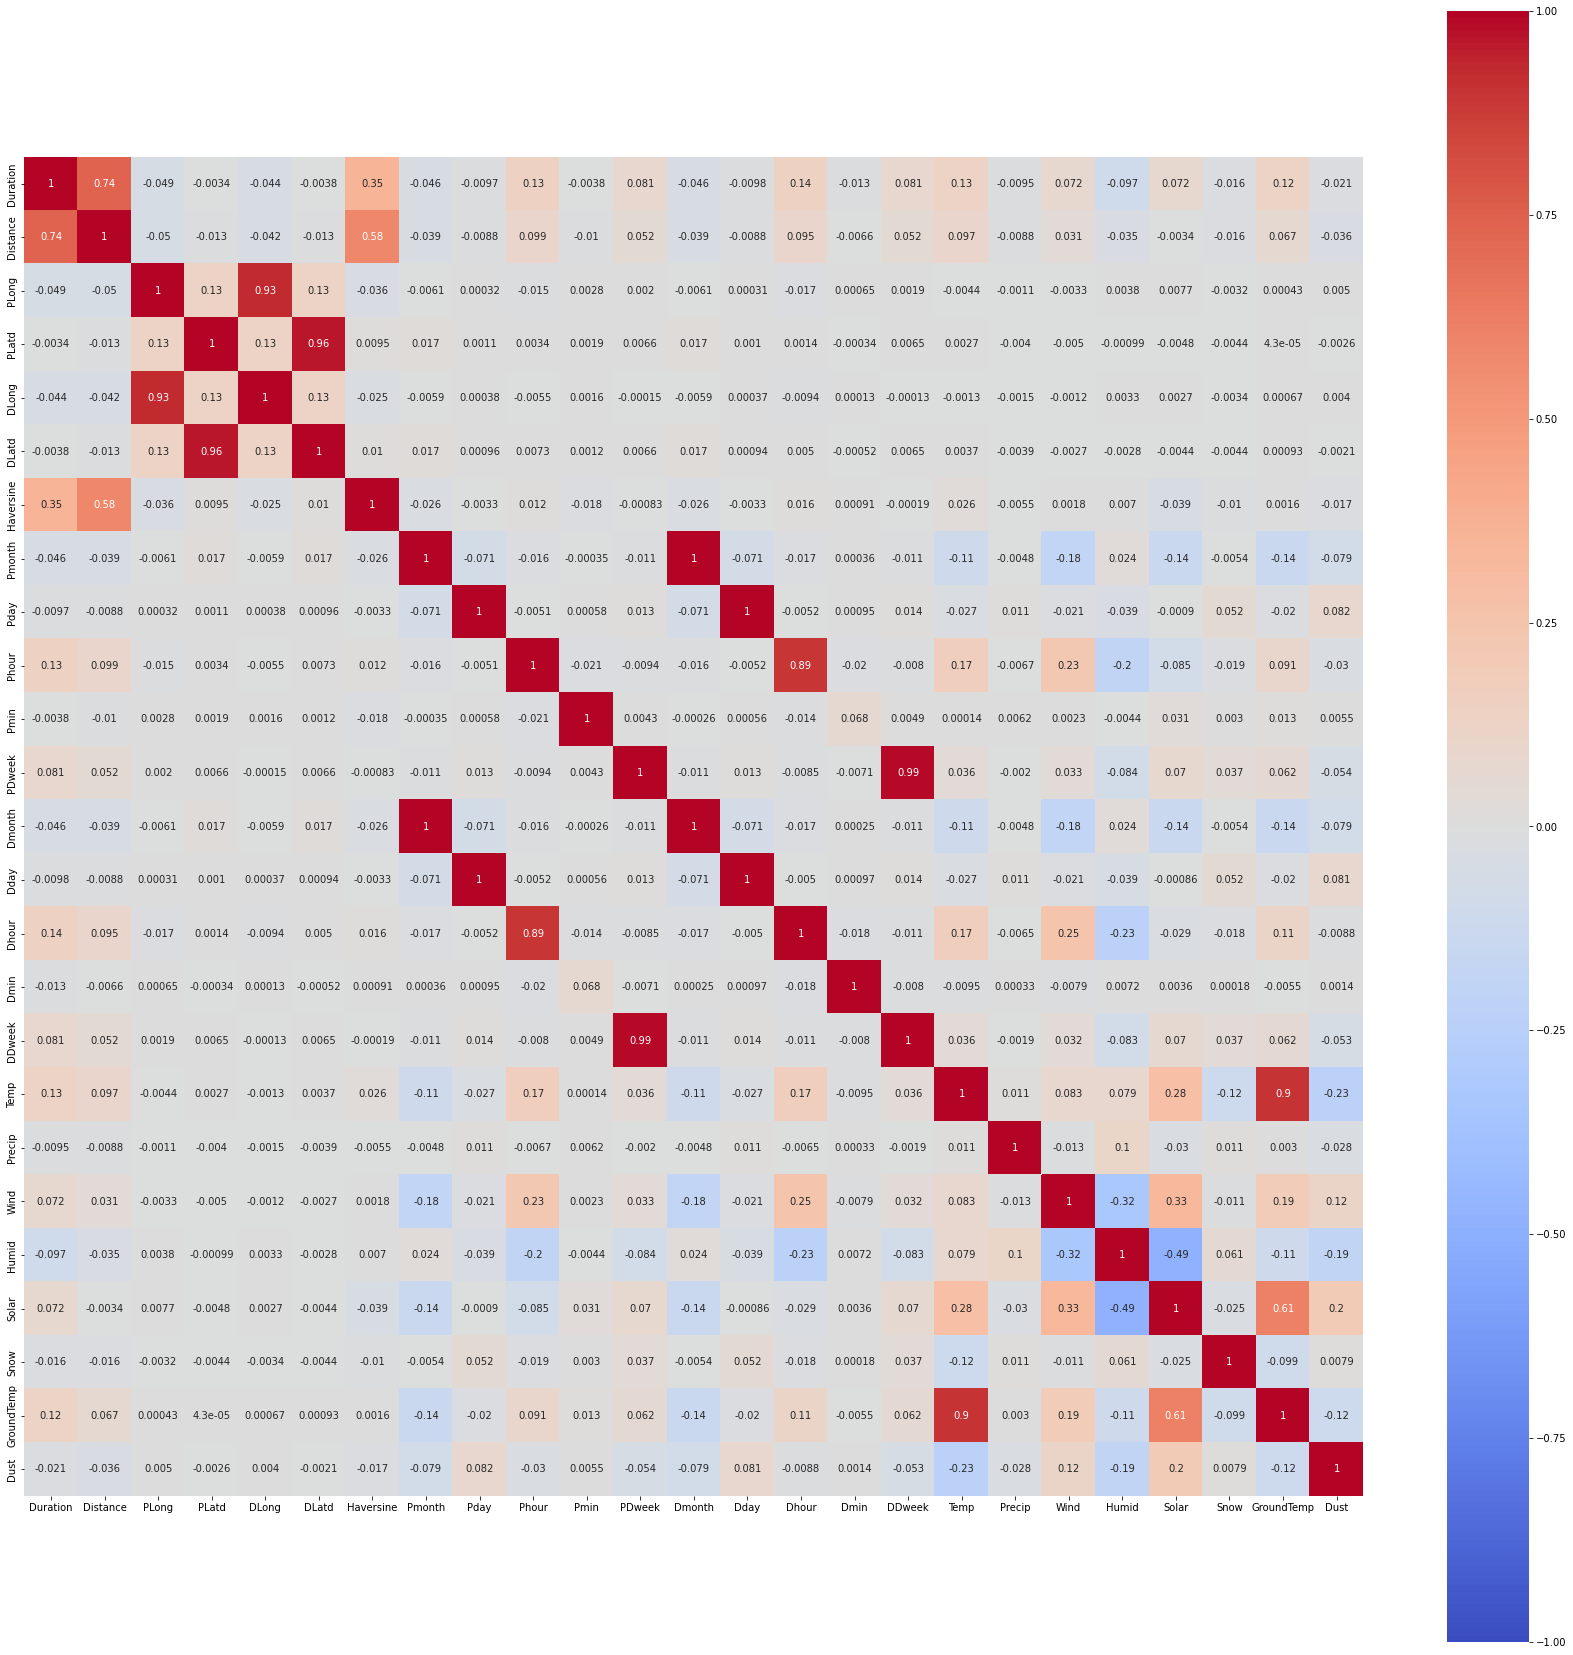

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

#### This is the list of sorted correlation of variables to the target

In [ ]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Duration'],columns=['Correlation to the Duration'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

####  

In [ ]:
sep = ','
target = 'Duration'
datapath = ''
filename = '/content/drive/MyDrive/higgs/For_modeling.csv'
df = pd.read_csv(datapath+filename,sep=sep,index_col=None)
df = df.sample(frac=1.0,random_state=42)
print(df.shape)
df.head(1)

(9601139, 26)


Unnamed: 0  Duration  Distance  ...  Snow  GroundTemp  Dust
7575138     7773438        40      5060  ...   0.0        10.9  11.0

[1 rows x 26 columns]

    max_rows_analyzed is smaller than dataset shape 9601139...
        randomly sampled 1500 rows from read CSV file
Shape of your Data Set loaded: (1500, 26)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 1500 rows, 25 cols
Data Set columns info:
* Unnamed: 0: 0 nulls, 1500 unique vals, most common: {9730047: 1, 9460367: 1}
* Distance: 0 nulls, 685 unique vals, most common: {720: 11, 1440: 10}
* PLong: 0 nulls, 774 unique vals, most common: {37.526989: 12, 37.56590300000001: 10}
* PLatd: 0 nulls, 781 unique vals, most common: {126.932098: 12, 126.90118400000001: 10}
* DLong: 0 nulls, 775 unique vals, most common: {37.531859999999995: 12, 37.513126: 12}
* DLatd: 0 nulls, 782 unique vals, most common: {127.10096000000001: 12, 127.06719199999999: 12}
* Haversine: 0 nulls, 1251 unique vals, most common: {0.0: 171, 0.6121785438048579: 5}
* Pmonth: 0 nulls, 12 unique vals, most common: {10: 222, 9: 217}
* Pd

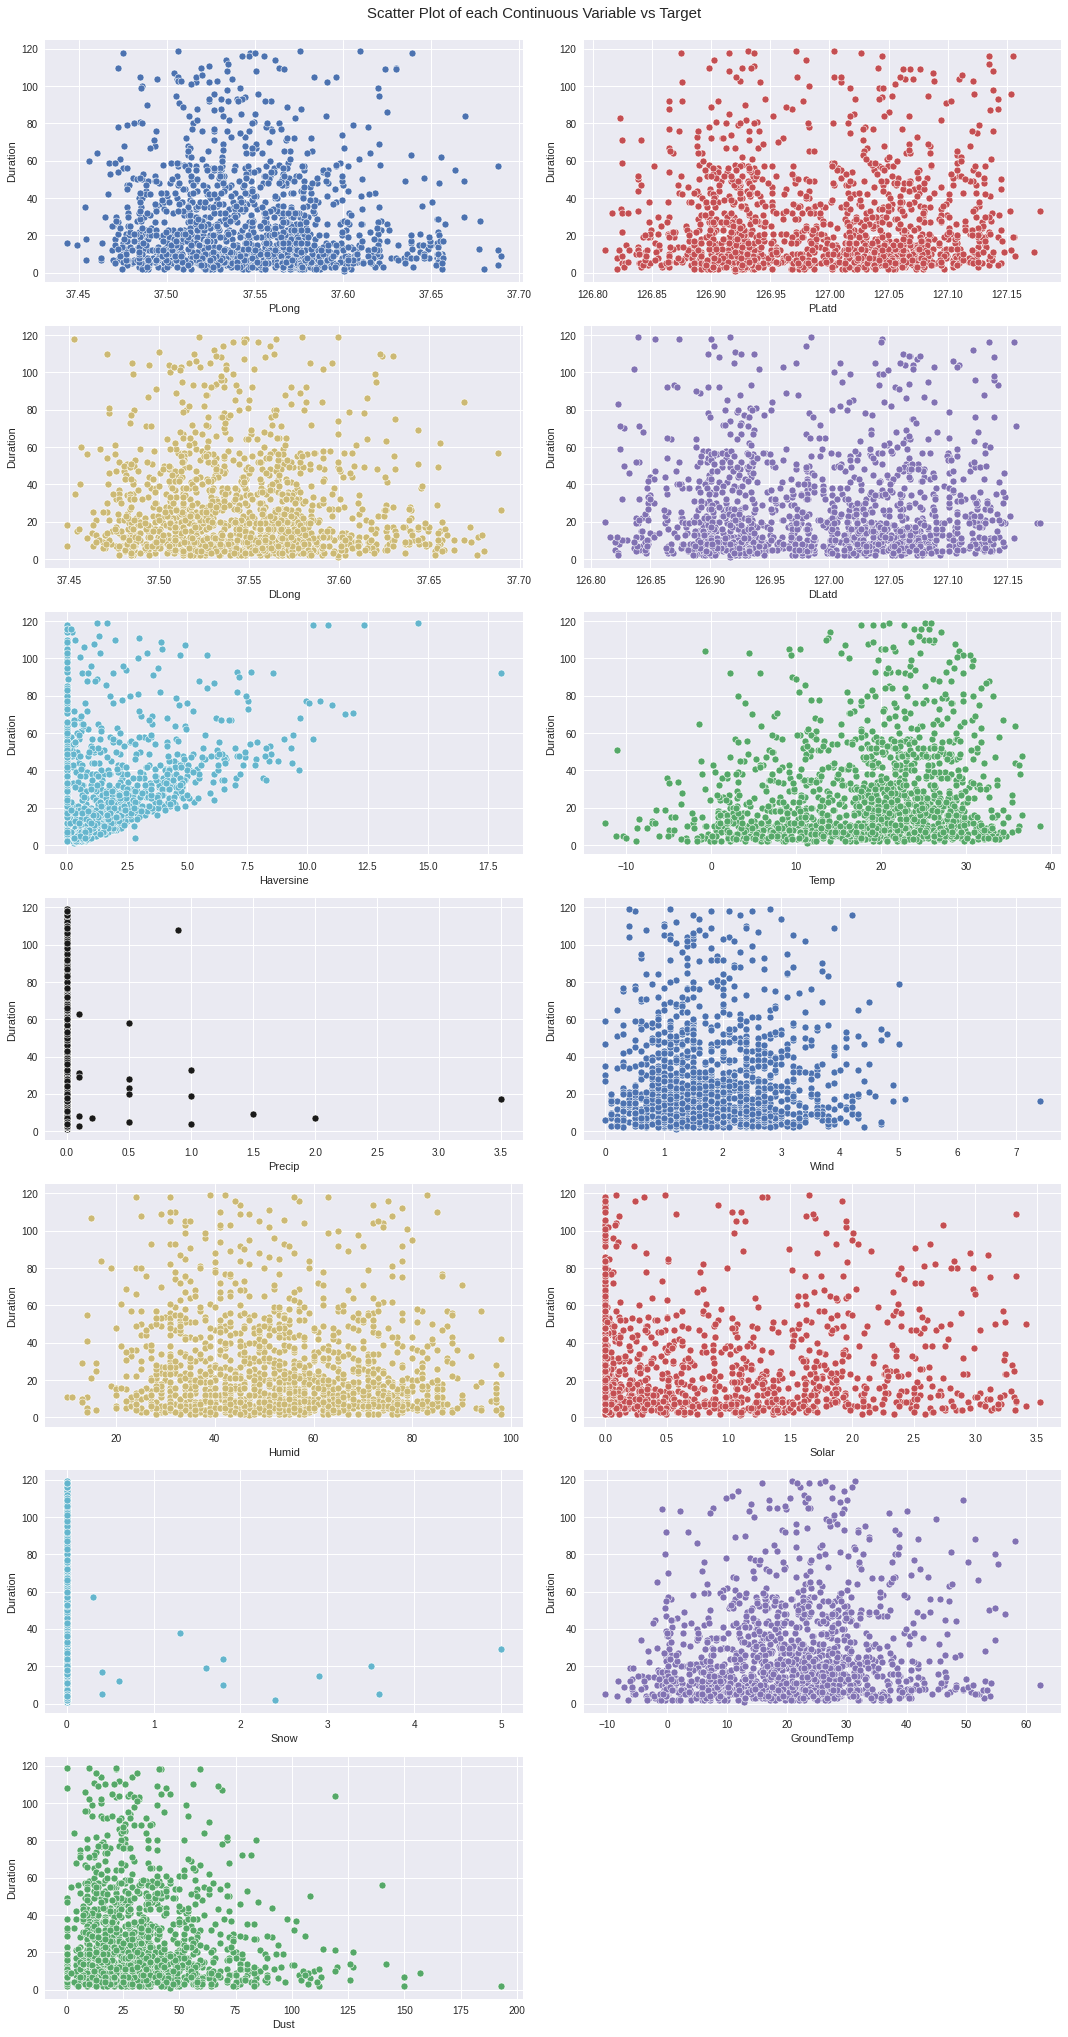

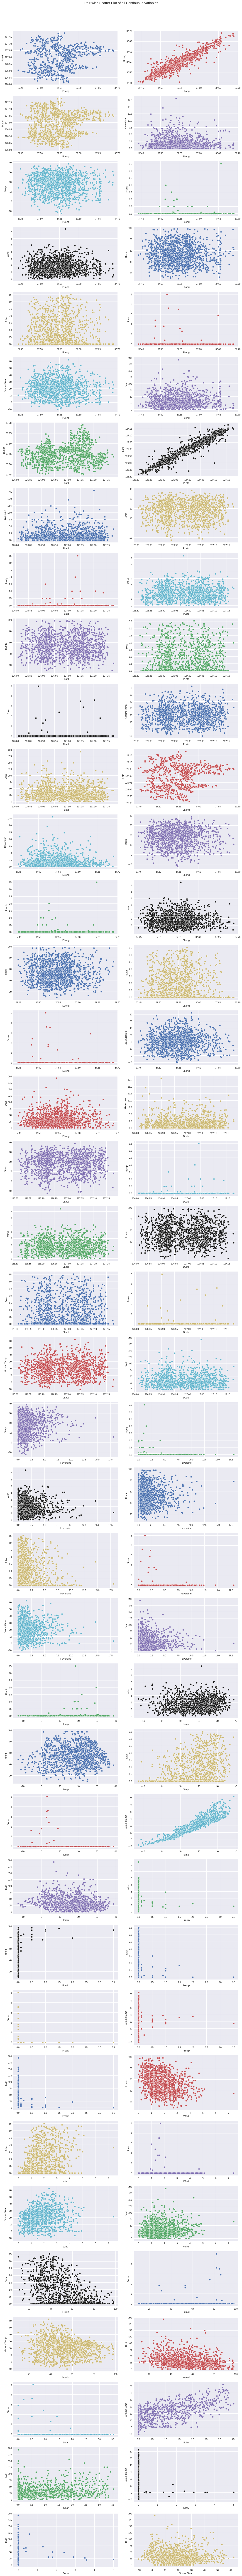

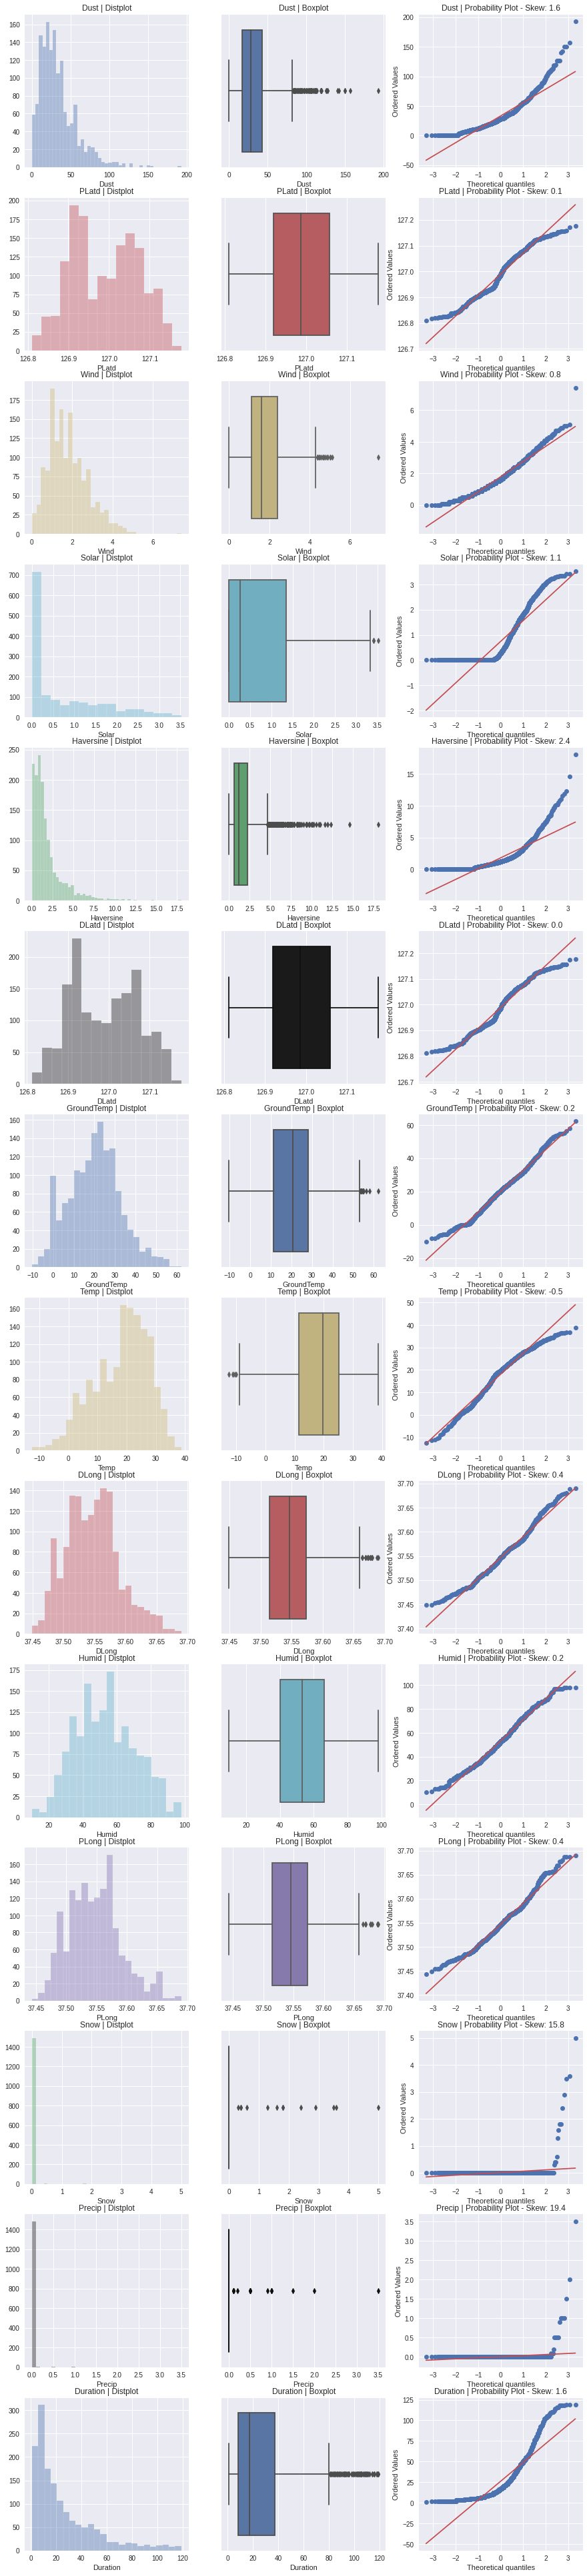

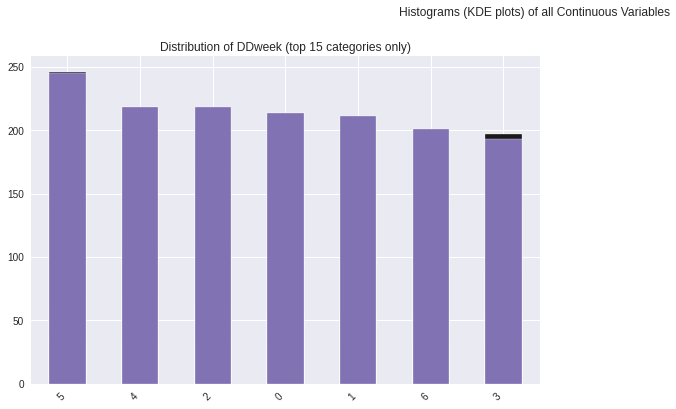

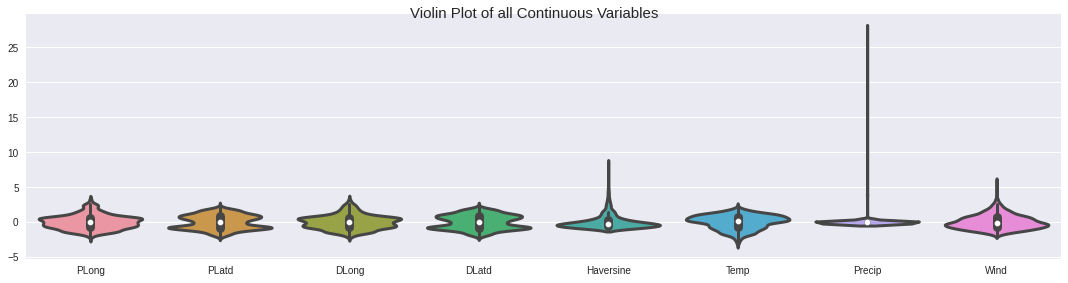

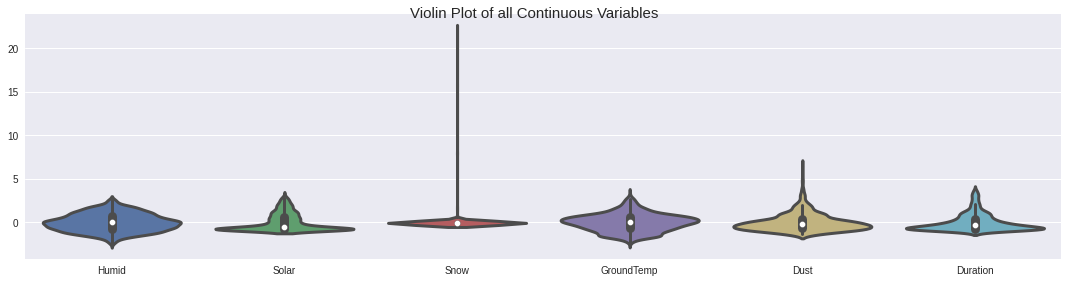

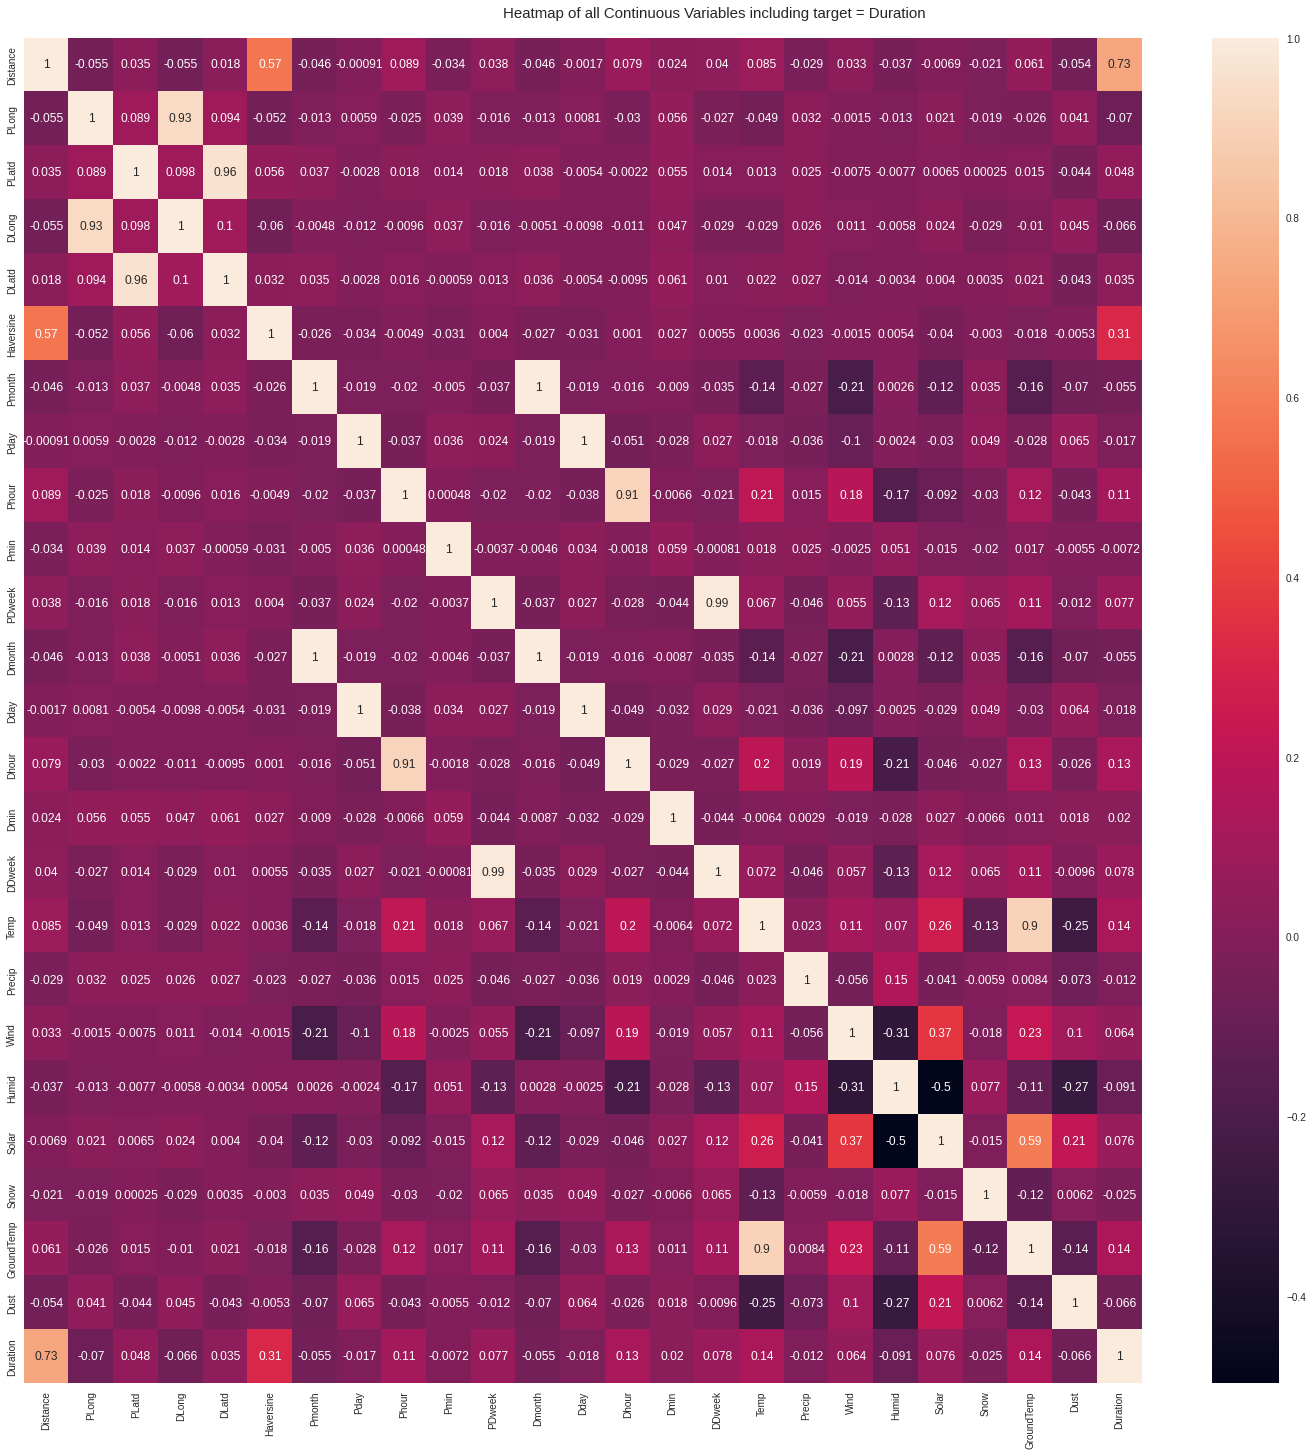

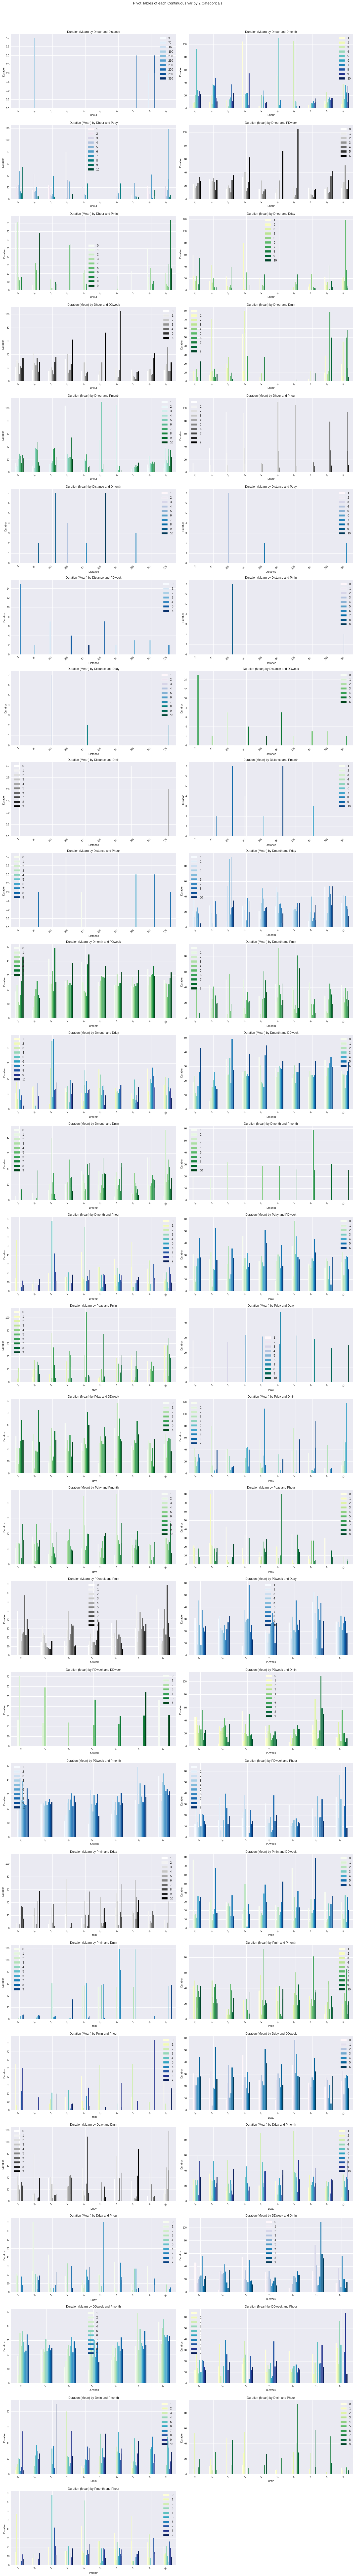

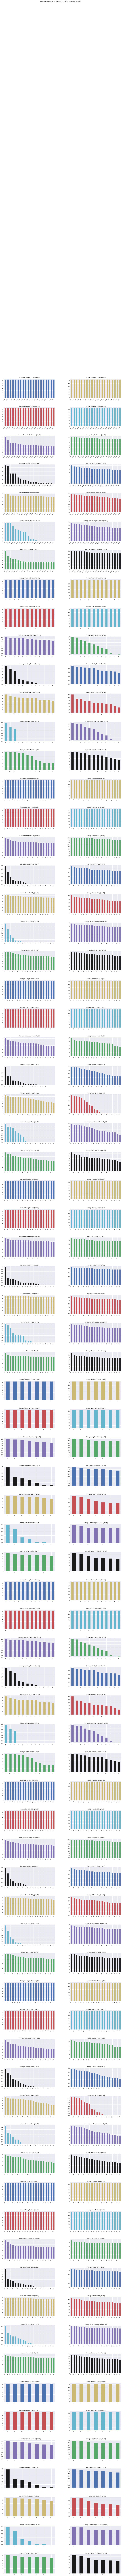

In [ ]:
dft = AV.AutoViz(datapath+filename, sep=sep, depVar=target, dfte=df, header=0, verbose=2,
                            lowess=False,chart_format='svg',max_rows_analyzed=1500,max_cols_analyzed=30)

In [ ]:
dabl.plot(df,'Duration')

Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b9ee5f210>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b9ea387d0>,
       dtype=object)]

# Step 2 : Data Preparation and data Visualisation using Matplotlib and seaborn

## Plotting variables to the target 

#### So let's focus on the Pmonth & Dmonth where we have the most Duration



In [ ]:
df1VizPmonth=pd.DataFrame(df.groupby('Pmonth').sum()['Duration'].sort_values(ascending=False))
df1VizPmonth.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

In [ ]:
df1VizDmonth=pd.DataFrame(df.groupby('Dmonth').sum()['Duration'].sort_values(ascending=False))
df1VizDmonth.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

###### Let's verify that it is linked to the PDweek & DDweek
this shows that on Friday the highest number of duration trips had occured.
0: for Sunday, 6: Saturday

In [ ]:
df1VizPDweek=pd.DataFrame(df.groupby('PDweek').sum()['Duration'].sort_values(ascending=False))
df1VizPDweek.style.background_gradient(cmap=sns.light_palette("blue", as_cmap=True))


In [ ]:
df1VizDDweek=pd.DataFrame(df.groupby('DDweek').sum()['Duration'].sort_values(ascending=False))
df1VizDDweek.style.background_gradient(cmap=sns.light_palette("blue", as_cmap=True))


In [7]:
df['label_day_night']=df['Phour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))
df1VizDay=pd.DataFrame(df.groupby('label_day_night').sum()['Duration'].sort_values(ascending=False))
df1VizDay.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

####  

In [8]:
Q1 = df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Duration        28.000000
Distance      3390.000000
PLong            0.059002
PLatd            0.141732
DLong            0.059002
DLatd            0.143029
Haversine        1.687945
Pmonth           4.000000
Pday            15.000000
Phour            9.000000
Pmin            30.000000
PDweek           4.000000
Dmonth           4.000000
Dday            15.000000
Dhour           10.000000
Dmin            30.000000
DDweek           4.000000
Temp            13.300000
Precip           0.000000
Wind             1.300000
Humid           26.000000
Solar            1.260000
Snow             0.000000
GroundTemp      16.900000
Dust            26.000000
dtype: float64


In [9]:
df_out = df[~((df< (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
df_out

Duration  Distance      PLong  ...  GroundTemp  Dust  label_day_night
0               3        50  37.544666  ...        -2.2  25.0            Night
2               8      1390  37.544590  ...        -2.2  25.0            Night
3               8      1820  37.571102  ...        -2.2  25.0            Night
4               4       850  37.573242  ...        -2.2  25.0            Night
5               8      1800  37.571102  ...        -2.2  25.0            Night
...           ...       ...        ...  ...         ...   ...              ...
9601129        40      6200  37.622662  ...        -5.1  53.0            Night
9601132        70      7410  37.549767  ...        -5.1  53.0            Night
9601133        52      2270  37.540089  ...        -5.1  53.0            Night
9601134        67      6930  37.562607  ...        -5.1  53.0            Night
9601135        58      8320  37.511982  ...        -5.1  53.0            Night

[7361308 rows x 26 columns]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [ ]:
vif

VIF    Features
0   4.337353e+00    Distance
1   1.055063e+07       PLong
2   7.433271e+07       PLatd
3   1.056632e+07       DLong
4   7.427208e+07       DLatd
5   4.251730e+00   Haversine
6   5.501862e+04      Pmonth
7   9.845652e+02        Pday
8   4.014653e+01       Phour
9   3.881325e+00        Pmin
10  1.834682e+02      PDweek
11  5.502038e+04      Dmonth
12  9.844264e+02        Dday
13  3.835519e+01       Dhour
14  4.051066e+00        Dmin
15  1.833962e+02      DDweek
16  8.928431e+01        Temp
17           NaN      Precip
18  6.057300e+00        Wind
19  1.885665e+01       Humid
20  8.708322e+00       Solar
21           NaN        Snow
22  9.632862e+01  GroundTemp
23  4.150605e+00        Dust

In [10]:
df_out=df_out.drop(["PLong","PLatd","DLong","DLatd"], axis=1)

####  

# Step 3 : Modeling
 

####  

#### Let's import libraires needed in this modeling part

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


#### Let's create an object to report results

In [12]:
reporting={}

In [13]:

df_out.drop(["label_day_night"], axis=1,inplace=True)

In [14]:
X=df_out.drop(['Duration'],axis =1)
y=df_out["Duration"] #the target


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

## Mutiple Linear Regression 

In [16]:
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_train, y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)

In [17]:
print('The equation of this Linear Regression has format : y= coefficient*Features + intercept')
print('Linear model intercept: {} and the coefficients are: {}'
     .format(fitregr.intercept_,fitregr.coef_))

The equation of this Linear Regression has format : y= coefficient*Features + intercept
Linear model intercept: 2.9126027519491657 and the coefficients are: [ 7.23680616e-03 -3.15130763e+00 -1.10468504e+00  1.03447079e-02
 -8.87606492e-03  7.82239900e-05 -6.10456841e-03  1.08595267e+00
 -1.74562073e-02  1.25848850e-01 -3.61429043e-03  2.13066820e-01
  8.37103763e-02 -3.83026943e-15  1.39632424e-01 -3.06477500e-02
  7.09390667e-01  0.00000000e+00 -2.63517487e-02  2.75167263e-03]


After fitting the model, we print the score between predictions and test targets

In [18]:
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_train )))
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square is: {}'
     .format(train_set_r2,train_set_rmse))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_test )))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square is: {}'
     .format(test_set_r2,test_set_rmse))

Linear model, R2 train score is : 0.6111578606704418 and the train root mean square is: 9.813048203743449
Linear model, R2 test score is : 0.6109089477822764 and the test root mean square is: 9.809432037332963


In [ ]:
reporting['Linear regression']=fitregr

In [22]:
import pickle

In [33]:
pickle.dump(fitregr, open("model1.pkl",'wb'))

In [34]:
model1=pickle.load(open("model1.pkl",'rb'))

In [ ]:
y_train

3849345    46
6710788     7
8911115     2
3701478     5
4446164     4
           ..
8860512     6
3742190    19
2496112     4
1771624     6
8094803    43
Name: Duration, Length: 5152915, dtype: int64

In [28]:
X_predi=[6930,	0.000000,	8,	22,	14,	48,	2,	8,	22,	15,	25,	2,36.2,	0.0,1.5,36.0,2.87,0.0,52.1,17.0]
X_predict= np.array(X_predi).astype(np.int64)
X_predict.dtype

dtype('int64')

In [ ]:
X_predict

array([6930,   37,  126,   37,  126,    0,    8,   22,   14,   48,    2,
          8,   22,   15,   25,    2,   36,    0,    1,   36,    2,    0,
         52,   17])

In [36]:
a= model1.predict([X_predi])
a

array([57.69439618])

####  